---
## Step 0: Load The Data

Data: I chose to keep all the data in the 'tsc_data/' folder in the current directory. There is also an additional augTrain.p dataset which I pickle dumped here as well that has the original training dataset augmented with transformed images to imporove the accuracy of CNN training.

In [10]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data
dataDir = 'tsc_data/'
trainFile = 'train.p'
validFile = 'valid.p'
testFile = 'test.p'

training_file = dataDir+trainFile
validation_file= dataDir+validFile
testing_file = dataDir+testFile

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    print ('loaded orig training dataset')
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    print ('loaded orig validation dataset')
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    print ('loaded orig test dataset')
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

loaded orig training dataset
loaded orig validation dataset
loaded orig test dataset


# Step 1

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

###1 Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

SOLN: I used numpy attributes to compute the size of various arrays in the provided pickle dataset. The results are as follows:
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [11]:
# Check datalenghts are the same
assert (len(x_train) == len(y_train))
assert (len(x_valid) == len(y_valid))
assert (len(x_test) == len(y_test))

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = x_train.shape[0]

# TODO: Number of validation examples
n_validation = x_valid.shape[0]

# TODO: Number of testing examples.
n_test = x_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

x_valid_bkp = x_valid
y_valid_bkp = y_valid

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

###2 Include an exploratory visualization of the dataset.

SOLN: Here, I randomly choose 10 images from the given training dataset and plot them in a (2,5) grid with the corresponding labels as titles. I removed the x- and y-axis ticks for a clear view of the images. As seen from the images, they seem to be of low resolution, warped, rotated, and/or blurred in most cases.

I also provide a graph of labels vs counts to get an understanding of how many samples are available in the dataset for each label. There seems to be a large disparity, which I will use at a later stage in deciding how many images of a certain type to transform and add to the training dataset.

min and max number of samples among all labels:
-----------------------------------------------------
min number of samples:  180
max number of samples:  2010

[34528  9417 24235 30342 23356 26586 33899  2350 17165  1762]


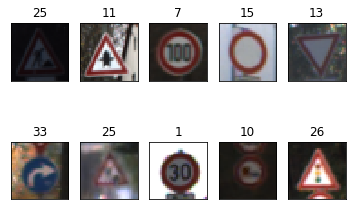

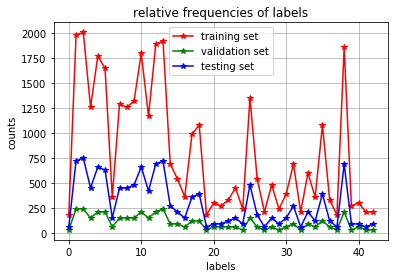

min and max number of samples among all labels
min number of samples:  180
max number of samples:  2010


In [12]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

# Visualizations will be shown in the notebook.
%matplotlib inline
# randomly plot 10 training images
idx = np.random.randint(0, len(x_train), 10)
print (idx)
plt.figure()
jj = 1
for ii in idx:
	plt.subplot(2,5,jj)
	plt.imshow(x_train[ii])
	plt.title(y_train[ii])
	plt.xticks([])
	plt.yticks([])
	jj += 1

# Plot frequency of training samples of a certain class
def dict2Plot(dataIn):
	bins = Counter(dataIn)
	bins = sorted(bins.items())
	x, y = zip(*bins)
	return x, y

y_train_x, y_train_y = dict2Plot(y_train)
y_valid_x, y_valid_y = dict2Plot(y_valid)
y_test_x, y_test_y = dict2Plot(y_test)

plt.figure()
plt.plot(y_train_x, y_train_y, '-*r', \
	y_valid_x, y_valid_y, '-*g', \
	y_test_x, y_test_y, '-*b')
plt.grid()
plt.title('relative frequencies of labels')
plt.legend(['training set', 'validation set', 'testing set'])
plt.xlabel('labels')
plt.ylabel('counts')
plt.show()

print ('min and max number of samples among all labels')
print ('==============================================')
print ('min number of samples: ', min(y_train_y))
print ('max number of samples: ', max(y_train_y))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

####3 Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques?

SOLN: There was a bit of a confusion here. In the video on Traffic Signal Classification, it is suggested to make changes to the LeNet function to include 3D images. However, the hint in this section suggests the use of grayscale images. Although I started with grayscale images, I decided to go with RGB images which might serve as better inputs to the network in making use of the colour scheme where grayscale images might fall short.

I normalize the training and test datasets as described in Cell 4.

In order to augment the training dataset, I use open-cv functions in order to transform images. I use four cv2 geometric transformation functions:
translation, rotation, affine, and perspective transformations. In addition, I also use a simple noise adder as a fifth "transfromation" function. These different transformation schemes were choosen to provide the augmented data a certain degree of richness they provide to the network in terms of image uncertainties.

In [13]:
# ***************************************************************
# Pre-process data
# Normalize data
def normalizeDataset(dataIn):
    return ( (dataIn-dataIn.mean()) / dataIn.std() )

x_train_norm = normalizeDataset(x_train)
x_test_norm = normalizeDataset(x_test)

In [14]:
# Augment training dataset with fake traffic signals
import cv2
# Ref: http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

def image_translate(inImg):
	rows, cols, _ = inImg.shape
	
	# Translate image by upto 3 pixels in both x and y directions
	translatePix = 3
	dx, dy = np.random.randint(-translatePix, translatePix, 2)
	
	M = np.float32([[1,0,dx], [0,1,dy]])
	dst = cv2.warpAffine(inImg, M, (cols,rows))

	return dst

def image_rotate(inImg):
	rows, cols, _ = inImg.shape
	
	# Rotate image by upto 10 degs
	rotateImg = 20
	rotateAngle = np.random.randint(-rotateImg, rotateImg, 1)
	
	M = cv2.getRotationMatrix2D((cols/2,rows/2), rotateAngle, 1)
	dst = cv2.warpAffine(inImg, M, (cols, rows))

	return dst

def image_affineTransform(inImg):
	rows, cols, _ = inImg.shape

	# Introduce perspective distortion in image
	# maintaining parallelism of lines
	x1 = cols/3
	y1 = rows/3
	x2 = 2*cols/3
	y2 = 2*rows/3
	pts1 = np.float32([
		[y1,x1], 
		[y2,x1], 
		[y2,x2]
		])

	xrand = np.random.rand(3) - 0.5
	xrand *= cols * 0.05
	yrand = np.random.rand(3) - 0.5
	yrand *= cols * 0.05
	pts2 = np.float32([
		[y1+yrand[0],x1+xrand[0]], 
		[y2+yrand[1],x1+xrand[1]], 
		[y2+yrand[2],x2+xrand[2]]
		])

	M = cv2.getAffineTransform(pts1, pts2)
	dst = cv2.warpAffine(inImg, M, (cols,rows))

	return dst

def image_perspectiveTransform(inImg):
	rows, cols, _ = inImg.shape

	# Introduce perspective distortion
	# without preserving parallelism, length, rotateAngle
	# preserving collinearity and incidence
	# Ref: https://www.graphicsmill.com/docs/gm5/Transformations.htm

	# Transform up to 3 pix
	transformPix = 3
	pix = np.random.randint(-transformPix, transformPix, 1)
	pts1 = np.float32([
		[pix, pix],
		[rows-pix,pix],
		[pix,cols-pix],
		[rows-pix,cols-pix]
		])
	pts2 = np.float32([
		[0,0],
		[rows,0],
		[0,cols],
		[rows,cols]
		])

	M = cv2.getPerspectiveTransform(pts1,pts2)
	dst = cv2.warpPerspective(inImg, M, (rows,cols))

	return dst

def image_noisy(inImg):
	rows, cols, depth = inImg.shape

	stddev = .04
	noisy_img = inImg.squeeze() + np.random.randn(rows,cols,depth) * stddev

	return noisy_img

def getRandomFakeDataSample(inImg, process):
	inImg = inImg.squeeze()
	if process == 0:
		ret = image_translate(inImg)
	elif process == 1:
		ret = image_rotate(inImg)
	elif process == 2:
		ret = image_affineTransform(inImg)
	elif process == 3:
		ret = image_perspectiveTransform(inImg)
	else:
		ret = image_noisy(inImg)

	return ret

####4 Consider including images showing the output of each preprocessing technique

SOLN: I picked 5 images at random from the provided training set and carried out the five transfrormation schemes described in ####3. The results can be seen after executing Cell 7.

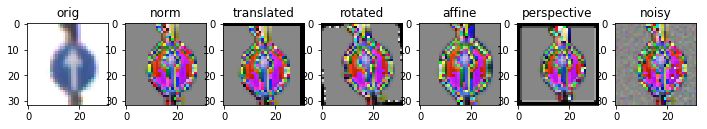

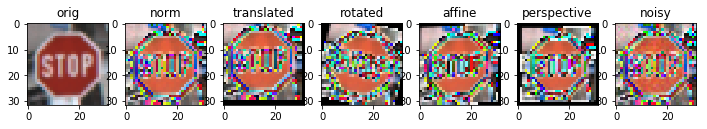

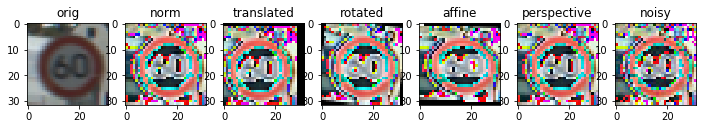

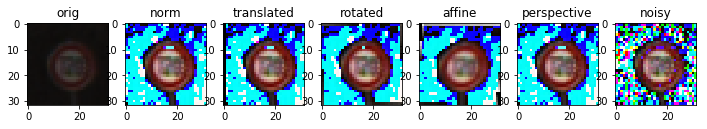

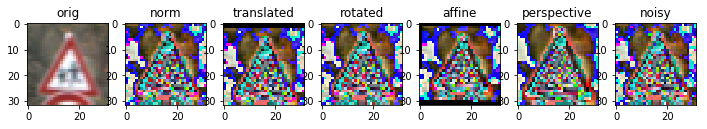

transformed image sizes
x_train_norm:  (32, 32, 3)
translated image:  (32, 32, 3)
rotated image:  (32, 32, 3)
affine image:  (32, 32, 3)
perspective image:  (32, 32, 3)
noisy image:  (32, 32, 3)


In [15]:
# Tests
# pick 5 random images from the x_train_norm set
rndIdx = np.random.randint(0,x_train_norm.shape[0],5)

for ii in range(len(rndIdx)):
	trans = image_translate(x_train_norm[rndIdx[ii]].squeeze())
	rot = image_rotate(x_train_norm[rndIdx[ii]].squeeze())
	aff = image_affineTransform(x_train_norm[rndIdx[ii]].squeeze())
	pers = image_perspectiveTransform(x_train_norm[rndIdx[ii]].squeeze())
	noisy = image_noisy(x_train_norm[rndIdx[ii]].squeeze())

	plt.figure(figsize=(12, 10))
	plt.subplot(171)
	plt.imshow(x_train[rndIdx[ii]].squeeze())
	plt.title('orig')
	plt.subplot(172)
	plt.imshow(x_train_norm[rndIdx[ii]].squeeze())
	plt.title('norm')
	plt.subplot(173)
	plt.imshow(trans.squeeze())
	plt.title('translated')
	plt.subplot(174)
	plt.imshow(rot.squeeze())
	plt.title('rotated')
	plt.subplot(175)
	plt.imshow(aff.squeeze())
	plt.title('affine')
	plt.subplot(176)
	plt.imshow(pers.squeeze())
	plt.title('perspective')
	plt.subplot(177)
	plt.imshow(noisy.squeeze())
	plt.title('noisy')
plt.show()
print ('transformed image sizes')
print ('=======================')
print ('x_train_norm: ', x_train_norm[rndIdx[ii]].shape)
print ('translated image: ', trans.shape)
print ('rotated image: ', rot.shape)
print ('affine image: ', aff.shape)
print ('perspective image: ', pers.shape)
print ('noisy image: ', noisy.shape)

####5 describe why you decided to generate additional data, how you generated the data

SOLN: As outlined in ####2, there is quite a gap in the number of training samples between various labels. They vary between 180 to 2010. This might lead to a bias in prediction. Hence, I decided to have at least 1000 training samples for each label. For labels with less than 1000 samples, I check for the deficit and augment images to the training dataset till there are 1000 samples for that label. The process of augmention adds images of that label with random translation, rotation, affine, perspective transformations, or noisy images.

This is achieved in Cell 7. However, due to this highly time consuming effort, the code is commented out. The augmened training set generated using this piece of code was saved as tsc_data/augTrain.p and is loaded in Cell 8.

In [16]:
# # Compute the class with maximum training samples
# max_cnt = 0
# class_val = 0
# for ii in range(n_classes):
# 	numElems_class_ii = (y_train == ii).sum()
# 	if numElems_class_ii > max_cnt:
# 		max_cnt = numElems_class_ii
# 		class_val = ii
# y_train_append = y_train
# x_train_norm_copy = x_train_norm

# x_train_norm_orig_shape = x_train_norm.shape
# y_train_orig_shape = y_train.shape
# imgs_added = 0
# min_samples_per_class = 1000
# print ('Adding synthetic data to the training set')
# print ('=========================================')
# print ('minimum samples per label set to: ', min_samples_per_class)
# print ('For each label deficient of min samples, add synthetic data via image transfromations')
# print ('Each + represents the addition of 100 more data samples to the label type')
# print ('==========================================================================')
# for ii in range(n_classes):
# 	class_idx = np.where(y_train == ii)
# 	nsamples = len(class_idx[0])
# 	if nsamples < min_samples_per_class:
# 		print ('[label, nsamples, deficit]: ',ii, nsamples, min_samples_per_class-nsamples)
# 		for jj in range(min_samples_per_class-nsamples):
# 			# Keep count of number of new images added to the training set
# 			imgs_added += 1
# 			# Randomly choose an image of the current label type
# 			concatImg = x_train_norm[class_idx[0][np.random.randint(0,nsamples,1)]]
# 			randTransform = np.random.randint(0,4)
# 			concatImg = getRandomFakeDataSample(concatImg, randTransform)
# 			x_train_norm_copy = np.concatenate((x_train_norm_copy, [concatImg]), axis=0)
# 			y_train_append = np.concatenate((y_train_append, [ii]), axis=0)
# 			if (jj % 100) == 0:
# 				print('+', end='')
# 		print ('')
# x_train_norm = x_train_norm_copy
# y_train = y_train_append

# pickle.dump( {'features': x_train_norm, 'labels': y_train}, open('tsc_data/augTrain.p', 'wb') )
# print ('augmented training data saved as tsc_data/augTrain.p')

# print ('stats after image transformation:')
# print ('=================================')
# print ('Total new images added to the training set: ', imgs_added)
# print ('x, y train orig shapes: ', x_train_norm_orig_shape, y_train_orig_shape)
# print ('x, y train append shapes: ', x_train_norm_copy.shape, y_train_append.shape)
# print ('x, y train new shapes: ', x_train_norm.shape, y_train.shape)

In [17]:
# Load augmented training dataset
augTrainFile = 'augTrain.p'
augTraining_file = dataDir+augTrainFile

with open(augTraining_file, mode='rb') as f:
    augTrain = pickle.load(f)
    print ('loaded augmented training dataset')

x_train, y_train = augTrain['features'], augTrain['labels']
assert (len(x_train) == len(y_train))

loaded augmented training dataset


####6 New training set

SOLN: The new training set has a frequency distribution for labels that is more balanced than the original training dataset.

Augmented training set: min and max number of samples among all labels
min number of samples:  1000
max number of samples:  2010

Augmented training set: min and max number of samples among all labels
min number of samples:  1000
max number of samples:  2010


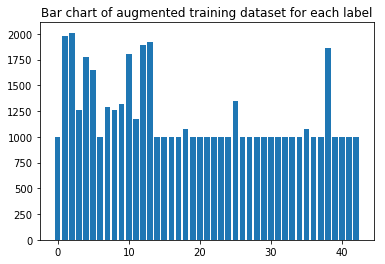

In [18]:
# Check number of training samples in augmented training set for each label
newBins = []
for ii in range(n_classes):
    newBins.append( (y_train == ii).sum() )
    
plt.figure()
plt.bar(range(0,n_classes), newBins)
plt.title('Bar chart of augmented training dataset for each label')
print ('Augmented training set: min and max number of samples among all labels')
print ('======================================================================')
print ('min number of samples: ', min(newBins))
print ('max number of samples: ', max(newBins))

####6 Split augmented training dataset into training and validation sets.

SOLN: As suggested in the lectures, I shuffle the augmented dataset and divide it between training and validation sets with an 80%-20% split.

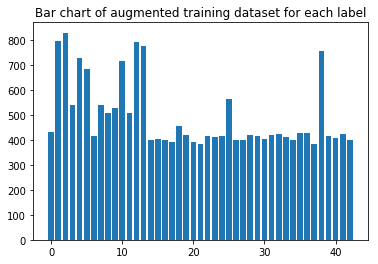

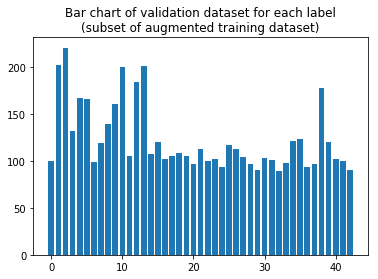

In [163]:
# Shuffle extended normalised grayscale training data set
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
# Split new training data set into training (80%) and validation sets (20%)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2)
# print ('New data set split into 80% training and 20% validation samples')
# print ('===============================================================')

newTrainBins = []
for ii in range(n_classes):
    newTrainBins.append( (y_train == ii).sum() )
plt.figure()
plt.bar(range(0,n_classes), newTrainBins)
plt.title('Bar chart of augmented training dataset for each label')

newValidBins = []
for ii in range(n_classes):
    newValidBins.append( (y_valid == ii).sum() )
plt.figure()
plt.bar(range(0,n_classes), newValidBins)
plt.title('Bar chart of validation dataset for each label' + '\n' + '(subset of augmented training dataset)')
plt.show()

### Model Architecture

####7 Model architecture details: The submission provides details of the characteristics and qualities of the architecture, including the type of model used, the number of layers, and the size of each layer.

SOLN: The LeNet architeture used here is derived from the one suggested in the lecture(https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb). Indeed with certain adaptations to handle the different labels as well as RGB images. The LeNet architecture consisted of two convolution layers and two fully connected layers. Here is a list of various layers and the sizes of corresponding inputs and outputs.

Layer1: Convolution
Input: 32x32x3; Output: 28x28x6
Max Pooling
Input = 28x28x6. Output = 14x14x6

Layer2: Convolution
In: 14x14x6, Out:10x10x16
Max Pooling
Input = 10x10x16. Output = 5x5x16

Layer3: Fully connected 
Input: 400, Output 120

Layer4: Fully connected 
Input: 120, Output: 84

Output layer: 
Input: 84, Output: 43

I did not use dropouts as the network accuracy fell with the option.

####8 what optimizer was used, batch size, number of epochs and values for hyperparameters

SOLN: The network used the Adam's optimizer. Here is a lis of tuning params used:
EPOCHS = 20
BATCH_SIZE = 128
mu = 0
sigma = 0.1
learning rate = 0.001

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [21]:
# Set up tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 128

print ('Setting up tensorflow')
print ('=====================')
print ('[Epochs, BATCH_SIZE]: ', EPOCHS, BATCH_SIZE)

Setting up tensorflow
[Epochs, BATCH_SIZE]:  20 128


In [22]:
# Train LeNet to classify traffic signs
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [23]:
# LeNet function for the training the network

# This part is derived from the example implementation of LeNet pointed to in the lecture
# on Convolution NN: 
# 	https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

# I learnt the flow of the network from this code for the MNIST dataset and will be using 
# it here as well
def LeNet(x):
	# Hyperparams
	mu = 0
	sigma = 0.1

	# Layer1: Convolution (In: 32x32x3, Out: 28x28x6)
	# Out computed as:
	# 	output_H = (input_H - filter_H + 1) / vertical_stride
	# 	output_W = (input_W - filter_W + 1) / horizontal_stride
	conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), \
		mean=mu, stddev=sigma)) # shape=(filt_W,filt_H,in_ht, out_ht)
	conv1_b = tf.Variable(tf.zeros(6))
	conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], \
		padding='VALID') + conv1_b

	# Layer1: activation
	conv1 = tf.nn.relu(conv1)

	# Layer1: pooling (Input = 28x28x6. Output = 14x14x6)
	conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], \
		strides=[1,2,2,1], padding='VALID')

	# Layer2: Convolution (In: 14x14x6, Out:10x10x16)
	conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), \
		mean=mu, stddev=sigma))
	conv2_b = tf.Variable(tf.zeros(16))
	conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], \
		padding='VALID') + conv2_b

	# Layer2: activation
	conv2 = tf.nn.relu(conv2)

	# Layer2: pooling (Input = 10x10x16. Output = 5x5x16)
	conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], \
		strides=[1,2,2,1], padding='VALID')

	# Flatten for fully connected layers (Input = 5x5x16. Output = 400)
	fc0 = flatten(conv2)

	# Layer3: Fully connected (Input: 400, Output 120)
	fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120), \
		mean=mu, stddev=sigma))
	fc1_b = tf.Variable(tf.zeros(120))
	fc1 = tf.matmul(fc0, fc1_w) + fc1_b

	# Layer3: activation
	fc1 = tf.nn.relu(fc1)
# 	fc1 = tf.nn.dropout(fc1, dropout)

	# Layer4: Fully connected (Input: 120, Output: 84)
	fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84), \
		mean=mu, stddev=sigma))
	fc2_b = tf.Variable(tf.zeros(84))
	fc2 = tf.matmul(fc1, fc2_w) + fc2_b

	# Layer4: activation
	fc2 = tf.nn.relu(fc2)
# 	fc2 = tf.nn.dropout(fc2, dropout)

	# Output layer: (Input: 84, Output: 43)
	fco_w = tf.Variable(tf.truncated_normal(shape=(84,43), \
		mean=mu, stddev=sigma))
	fco_b = tf.Variable(tf.zeros(43))
	logits = tf.matmul(fc2, fco_w) + fco_b

	return logits

In [24]:
# Model Evaluation
def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], \
            y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_opearation, \
            feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [58]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001
logits = LeNet(x)
print (logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(\
	labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)
print ('Training pipeline set')

Tensor("add_9:0", shape=(?, 43), dtype=float32)
Training pipeline set


In [59]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), \
    tf.argmax(one_hot_y, 1))
accuracy_opearation = tf.reduce_mean(\
    tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Model Evaluation
def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_loss = 0
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], \
            y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, \
                       feed_dict={x: batch_x, y: batch_y})
        accuracy = sess.run(accuracy_opearation, \
            feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    
    return total_loss / num_examples, total_accuracy / num_examples

####9 the approach to finding a solution. Accuracy on the validation set is 0.93 or greater.

SOLN: The setting we used for the MNIST dataset seemed to operate quite well for the current assignment. I tried including dropouts and playing with BATCH_SIZE but the resutls were generally worse than the default values previously used for the MNIST lab. The model achieved:


Training accuracy: 99.7%
Validation accuracy: 98%
Test accuracy: 91.5%


In [60]:
# variables to store training performance
train_loss = {}
train_accuracy = {}
valid_loss = {}
valid_accuracy = {}

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print ('**********')
    print ('Training')
    
    for ii in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], \
                y_train[offset:end]
            session.run(training_operation, \
                feed_dict={x: batch_x, y: batch_y})
        # Check accuracy of training network
        training_loss, training_accuracy = evaluate(x_train, y_train)
        # Check accruary of trained network against validation data
        validation_loss, validation_accuracy = evaluate(x_valid, y_valid)
        
        train_loss[ii] = training_loss
        train_accuracy[ii] = training_accuracy
        valid_loss[ii] = validation_loss
        valid_accuracy[ii] = validation_accuracy
        
        print ('**********')
        print ('EPOCH {} ...'.format(ii+1))
        print ('Training accuracy = {:.3f}'.format(training_accuracy))
        print ('Validation accuracy = {:.3f}'.format(validation_accuracy))

    saver.save (session, './lenet')
    print ('**********')
    print ('Model saved')

**********
Training
**********
EPOCH 1 ...
Training accuracy = 0.853
Validation accuracy = 0.838
**********
EPOCH 2 ...
Training accuracy = 0.932
Validation accuracy = 0.919
**********
EPOCH 3 ...
Training accuracy = 0.954
Validation accuracy = 0.939
**********
EPOCH 4 ...
Training accuracy = 0.970
Validation accuracy = 0.957
**********
EPOCH 5 ...
Training accuracy = 0.977
Validation accuracy = 0.962
**********
EPOCH 6 ...
Training accuracy = 0.980
Validation accuracy = 0.964
**********
EPOCH 7 ...
Training accuracy = 0.988
Validation accuracy = 0.972
**********
EPOCH 8 ...
Training accuracy = 0.990
Validation accuracy = 0.971
**********
EPOCH 9 ...
Training accuracy = 0.990
Validation accuracy = 0.975
**********
EPOCH 10 ...
Training accuracy = 0.989
Validation accuracy = 0.975
**********
EPOCH 11 ...
Training accuracy = 0.991
Validation accuracy = 0.975
**********
EPOCH 12 ...
Training accuracy = 0.992
Validation accuracy = 0.976
**********
EPOCH 13 ...
Training accuracy = 0.990
Val

In [62]:
print ('testing trained network with test data (TBD: ONLY ONCE!)')
print ('========================================================')
with tf.Session() as session:
	saver.restore(session, tf.train.latest_checkpoint('.'))
	test_loss, test_accuracy = evaluate(x_test_norm, y_test)
	print ('Test accuracy: {:.3f}'.format(test_accuracy))

testing trained network with test data (TBD: ONLY ONCE!)
INFO:tensorflow:Restoring parameters from ./lenet
Test accuracy: 0.915


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

For the final exercise, I downloaded 7 images from the web and fed them to the model saved during training the network. I choose signs similar to a couple others in color. For instance, [do_not_enter, speed_limit_30mph], [priority_road, bicycle_crossing].

In [63]:
import csv

signLabel=[]
with open('signnames.csv') as inFile:
    reader = csv.DictReader(inFile, delimiter=',')
    for row in reader:
        signLabel.append((row['SignName']))

### Load and Output the Images

In [68]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import cv2
import numpy as np
import tensorflow as tf

dirIn = 'testImgs/'
imgFiles = os.listdir(dirIn)
x_finalTest = np.float32( np.zeros((len(imgFiles),32,32,3)) )

for ii in range(len(imgFiles)):
	print (imgFiles[ii])
	img = cv2.imread(dirIn+imgFiles[ii])
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	dim = (32,32)
	img_resize = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
	x_finalTest[ii] = img_resize

x_finalTest_orig = x_finalTest
print (x_finalTest.shape)
y_finalTest = [17, 23, 34, 12, 29, 14, 1]

17_noEntry.jpg
23_slipperyRd.png
34_leftTurnAhead.png
12_priorityRd.png
29_bicycleCrossing.jpg
14_stop.jpg
1_30mph.png
(7, 32, 32, 3)


### Predict the Sign Type for Each Image

In [69]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Normalize test images
x_finalTest = ( x_finalTest - x_finalTest.mean() ) / x_finalTest.std()

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    saver.restore(session, tf.train.latest_checkpoint('.'))
    prediction = session.run(tf.argmax(logits, 1), \
                                feed_dict={x: x_finalTest})
print (prediction)

INFO:tensorflow:Restoring parameters from ./lenet
[17 23 34 12 29 14  1]


### Analyze Performance

Test images


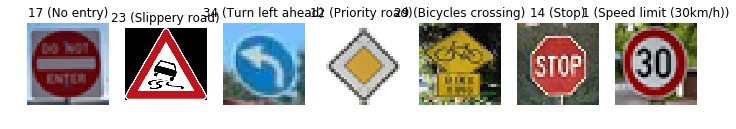

Classification output


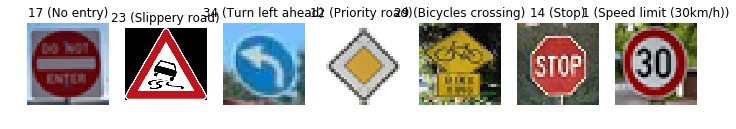

In [158]:
# Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print ('Test images')
print ('===========')
plt.figure(figsize=(12, 3))
for ii in range(len(imgFiles)):
	img = cv2.imread(dirIn+imgFiles[ii])
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.subplot(1,7,ii+1)
	plt.axis('off')
	plt.title(str(y_finalTest[ii]) + ' (' + signLabel[y_finalTest[ii]] + ')')
	plt.imshow(img)
plt.show()

print ('Classification output')
print ('=====================')
plt.figure(figsize=(12,3))
for ii in range(len(imgFiles)):
	img = cv2.imread(dirIn+imgFiles[ii])
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.subplot(1,7,ii+1)
	plt.axis('off')
	plt.title(str(prediction[ii]) + ' (' + signLabel[prediction[ii]] + ')')
	plt.imshow(img)
plt.show()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [71]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    saver.restore(session, tf.train.latest_checkpoint('.'))
    pred_prob = session.run(tf.nn.softmax(logits), feed_dict={x: x_finalTest})
    top5_softmax_prob = session.run(tf.nn.top_k(pred_prob, k=5))
print (top5_softmax_prob)


INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  1.00000000e+00,   2.40321923e-13,   5.97662795e-16,
          2.25438481e-16,   2.36887272e-17],
       [  1.00000000e+00,   5.07426878e-10,   3.89807070e-14,
          4.38171329e-15,   2.90739337e-15],
       [  1.00000000e+00,   2.16917437e-20,   9.98472229e-22,
          9.88554038e-22,   2.83573559e-22],
       [  1.00000000e+00,   1.68402361e-13,   1.21885235e-16,
          1.03379097e-17,   4.18574354e-19],
       [  9.98285472e-01,   8.29783676e-04,   5.68473188e-04,
          2.43098999e-04,   6.25658940e-05],
       [  1.00000000e+00,   1.00198611e-14,   1.92577176e-15,
          1.12565628e-15,   2.98715566e-16],
       [  1.00000000e+00,   2.88894064e-08,   2.25906831e-08,
          3.57288852e-19,   5.79708068e-23]], dtype=float32), indices=array([[17, 29, 21, 26, 22],
       [23, 30, 21, 31, 19],
       [34, 38, 40, 37, 36],
       [12, 42, 10, 11, 14],
       [29, 25, 24, 14, 21],
       [14, 15,  

Out of the 7 images, all were identified correctly. The results of the prediction are:

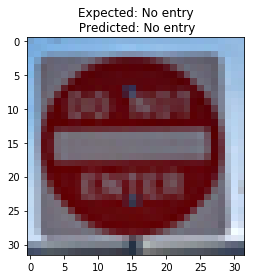

Predicted labels: Probability (%)
---------------------------------
No entry : 100.0
Bicycles crossing : 2.40321922518e-11
Double curve : 5.97662794753e-14
Traffic signals : 2.25438480656e-14
Bumpy road : 2.36887272448e-15



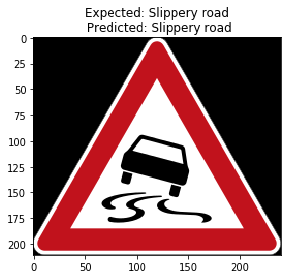

Predicted labels: Probability (%)
---------------------------------
Slippery road : 100.0
Beware of ice/snow : 5.07426878293e-08
Double curve : 3.89807069544e-12
Wild animals crossing : 4.38171329461e-13
Dangerous curve to the left : 2.90739336936e-13



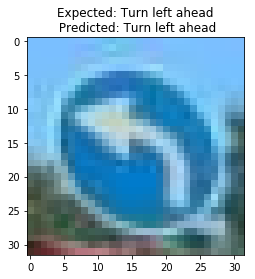

Predicted labels: Probability (%)
---------------------------------
Turn left ahead : 100.0
Keep right : 2.16917436611e-18
Roundabout mandatory : 9.98472228682e-20
Go straight or left : 9.88554038293e-20
Go straight or right : 2.83573558783e-20



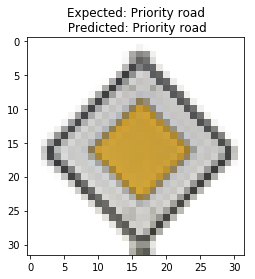

Predicted labels: Probability (%)
---------------------------------
Priority road : 100.0
End of no passing by vehicles over 3.5 metric tons : 1.68402360741e-11
No passing for vehicles over 3.5 metric tons : 1.21885235313e-14
Right-of-way at the next intersection : 1.03379097354e-15
Stop : 4.1857435381e-17



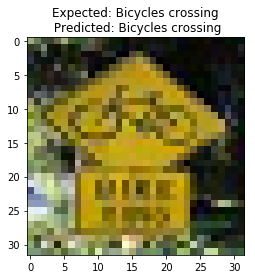

Predicted labels: Probability (%)
---------------------------------
Bicycles crossing : 99.8285472393
Road work : 0.0829783675727
Road narrows on the right : 0.0568473187741
Stop : 0.0243098998908
Double curve : 0.00625658940407



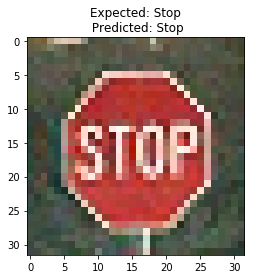

Predicted labels: Probability (%)
---------------------------------
Stop : 100.0
No vehicles : 1.00198610531e-12
Speed limit (60km/h) : 1.92577175723e-13
Speed limit (20km/h) : 1.12565628256e-13
No entry : 2.98715565621e-14



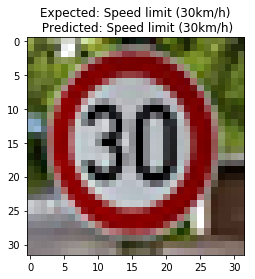

Predicted labels: Probability (%)
---------------------------------
Speed limit (30km/h) : 100.0
Speed limit (20km/h) : 2.88894064226e-06
Speed limit (50km/h) : 2.2590683102e-06
Speed limit (80km/h) : 3.57288852419e-17
Double curve : 5.79708067718e-21



In [155]:
for ii in range(len(imgFiles)):
    plt.figure()
    img = cv2.imread(dirIn+imgFiles[ii])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Expected: ' + signLabel[y_finalTest[ii]] + '\n ' \
              + 'Predicted: ' + signLabel[int(top5_softmax_prob[1][ii][0])])
    plt.show()
    print ('Predicted labels: Probability (%)')
    print ('---------------------------------')
    for jj in range(5):
        print (signLabel[int(top5_softmax_prob[1][ii][jj])],': ', end='')
        print (top5_softmax_prob[0][ii][jj]*100)
    print('')